## Temel Bileşen Analizi

* Temel bileşen analizi (TBA), çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümünü, varyansı maksimize edecek şekilde bulma yöntemidir.
* Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir.
* Daha sonra bu doğruya dik olanlar arasından yine en uygun doğru seçilerek, bu adımlar, yeni bir boyutun varyansı belirli bir eşiğin altına inene kadar tekrarlanır.
* Bu sürecin sonunda elde edilen doğrular, bir doğrusal uzayın tabanlarını oluşturur. Bu taban vektörlerine temel bileşen denir.
* Verinin temel bileşenleri birbirinden bağımsız olur.

## Veri Seti Tanıma

* Iris veri setinde 3 adet sınıf (Setosa, Versicolor and Virginica) ve bu sınıflara ait 4 adet özellik (sepal uzunluk (cm), sepal genişlik (cm), petal uzunluğu (cm) ve petal genişliği (cm)) bulunmaktadır.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data, columns=feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Temel bileşenlerden 2 tanesi elde edelim.

In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True) # whiten = veriyi normalize ediyor
pca.fit(data)

x_pca = pca.transform(data)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


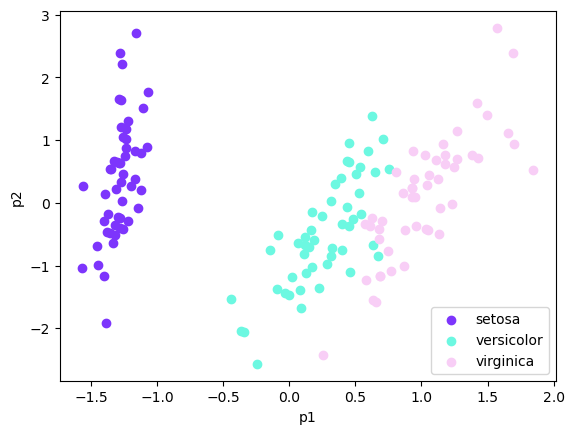

In [10]:
## Temel bileşenleri görselleştirelim
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["#7d35fc", "#6cf8e1", "#f8cef6"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each], df.p2[df.sinif == each], color = color[each], label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

* Temel bileşen analizi sonucunda setosa sınıfının diğer iki sınıftan tamamen ayrıldığını görebiliyoruz.
* Virginica ve Versicolor sınıfları ise neredeyse birbirlerinden ayrılmışlar, aralarında ince bir sınır bulunmaktadır.

## PCA ve kernel PCA karşılaştırma örneği

In [11]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [12]:
X,y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
# n_samples(1000 tane nokta oluştur), factor(iç-dış yarıçap), noise(gürültü)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [13]:
import matplotlib.pyplot as plt

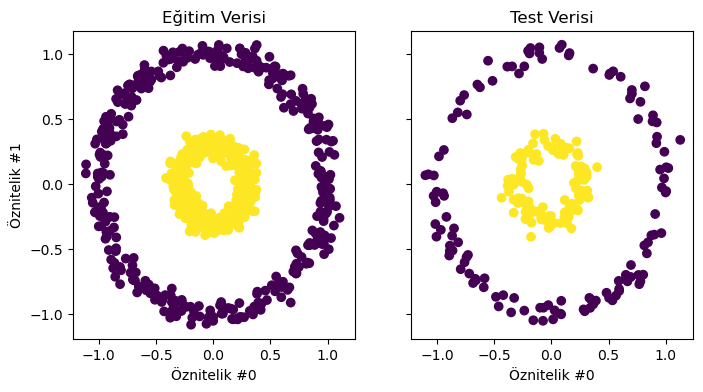

In [15]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize = (8,4))
train_ax.scatter(X_train[:,0], X_train[:,1], c=y_train)
train_ax.set_ylabel("Öznitelik #1")
train_ax.set_xlabel("Öznitelik #0")
train_ax.set_title("Eğitim Verisi")

test_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
test_ax.set_xlabel("Öznitelik #0")
_ = test_ax.set_title("Test Verisi")

In [16]:
from sklearn.decomposition import PCA, KernelPCA

In [17]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True,
    alpha=0.5)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

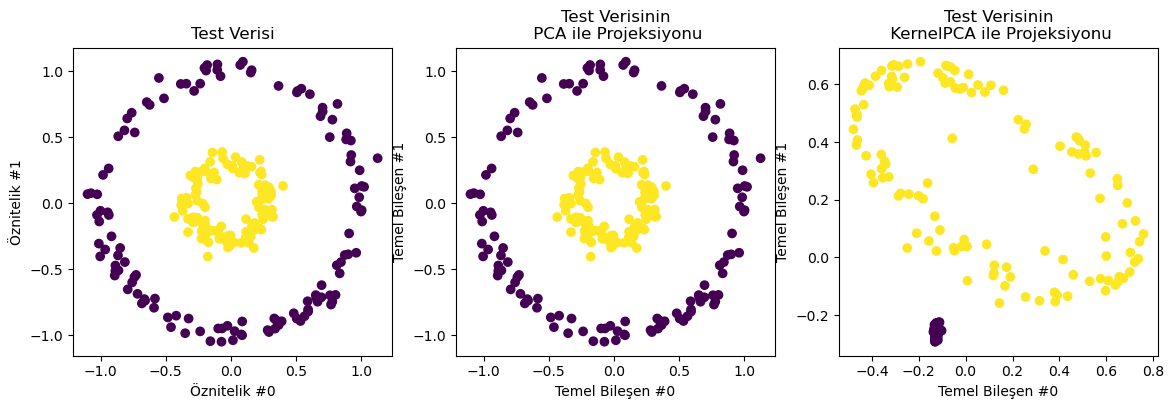

In [24]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(ncols=3, figsize=(14,4))

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")

pca_proj_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
pca_proj_ax.set_ylabel("Temel Bileşen #1")
pca_proj_ax.set_xlabel("Temel Bileşen #0")
pca_proj_ax.set_title("Test Verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:,0], X_test_kernel_pca[:,1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Temel Bileşen #1")
kernel_pca_proj_ax.set_xlabel("Temel Bileşen #0")
_ = kernel_pca_proj_ax.set_title("Test Verisinin\n KernelPCA ile Projeksiyonu")

In [25]:
# reconstruction - geri oluşturma
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

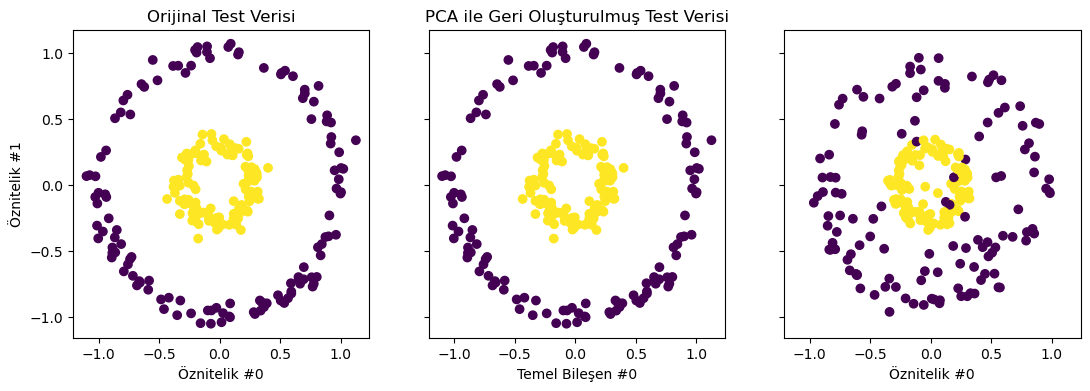

In [26]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, figsize=(13,4), sharex=True, sharey=True)

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Orijinal Test Verisi")

pca_back_proj_ax.scatter(X_reconstructed_pca[:,0], X_reconstructed_pca[:,1], c=y_test)
pca_back_proj_ax.set_xlabel("Temel Bileşen #0")
pca_back_proj_ax.set_title("PCA ile Geri Oluşturulmuş Test Verisi")

kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:,0], X_reconstructed_kernel_pca[:,1], c=y_test)
kernel_pca_back_proj_ax.set_xlabel("Öznitelik #0")
_ = kernel_pca_proj_ax.set_title("KernelPCA ile Geri Oluşturulmuş Test Verisi")

## Feature Selection

In [27]:
# Varyans Temelli Öznitelik Seçimi
from sklearn.feature_selection import VarianceThreshold

In [28]:
X = [[0,0,1], [0,1,0], [1,0,0], [0,1,1], [0,1,0], [0,1,1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [29]:
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8))) # var(x) = p(1-p)
sel.fit_transform(X)
# ilk sütunun elenmesini bekliyoruz
# zira orada 0 değeri olma olasılığı 5/6 > 0.8

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [30]:
# İstatistiksel Model Seçimi
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [32]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [33]:
# Model Temelli Öznitelik Seçimi
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [34]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [36]:
# L1 normu temelli öznitelik seçimi
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

In [37]:
# L2 normu temelli öznitelik seçimi
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [39]:
# Ağaç temelli öznitelik seçimi
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [40]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [41]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.09323347, 0.06899727, 0.39393383, 0.44383543])

In [42]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)